In [1]:
import os, sys, logging

import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from fa_discrete import *  

This is what we want to see (also a reference for the parameter ranges)

![goal.png](./goal1.png)


# Softened FA Model

In [2]:
eps = 0.00
time_step = 0.005

fa_discrete.py:190: RuntimeWarning: invalid value encountered in log
  self.g = np.log(np.tan(self.alpha / 2.))
INFO:root:Neighboring spins; Rate activation; Rate inactivation
INFO:root:Rate Flip (activation) [1, 0, 1]-> [1, 1, 1]: 0.5
INFO:root:Rate Flip (deaactivation)[1, 1, 1]-> [1, 0, 1]: 2.0 
INFO:root:Rate swap [1, 0, 1] -> [1, 1, 0]: 0.85728089356
INFO:root:Rate swap [1, 1, 1] -> [1, 1, 1]: 0.0
INFO:root:Rate Flip (activation) [1, 0, 0]-> [1, 1, 0]: 0.25
INFO:root:Rate Flip (deaactivation)[1, 1, 0]-> [1, 0, 0]: 1.0 
INFO:root:Rate swap [1, 0, 0] -> [1, 0, 0]: 0.0
INFO:root:Rate swap [1, 1, 0] -> [1, 0, 1]: 0.85728089356
INFO:root:Rate Flip (activation) [0, 0, 1]-> [0, 1, 1]: 0.25
INFO:root:Rate Flip (deaactivation)[0, 1, 1]-> [0, 0, 1]: 1.0 
INFO:root:Rate swap [0, 0, 1] -> [0, 1, 0]: 0.85728089356
INFO:root:Rate swap [0, 1, 1] -> [0, 1, 1]: 0.0
INFO:root:Rate Flip (activation) [0, 0, 0]-> [0, 1, 0]: 0.0
INFO:root:Rate Flip (deaactivation)[0, 1, 0]-> [0, 0, 0]: 0.0 
INFO:root:Ra

alpha -0.298199549687, g nan


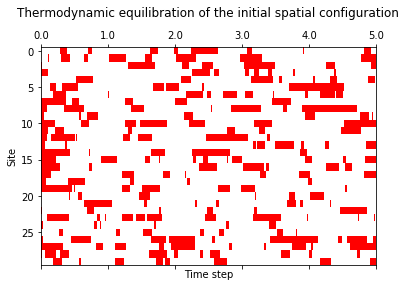

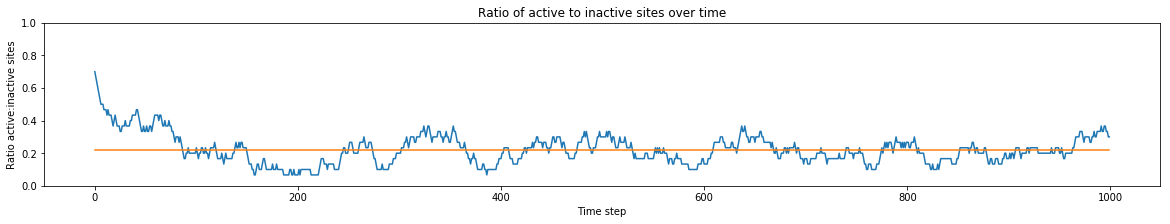

fa_discrete.py:301: RuntimeWarning: divide by zero encountered in divide
  times = -np.log(1 - np.random.uniform(size=rates.size)) / rates


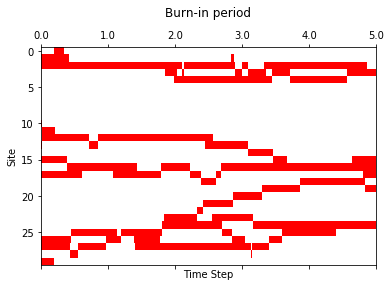

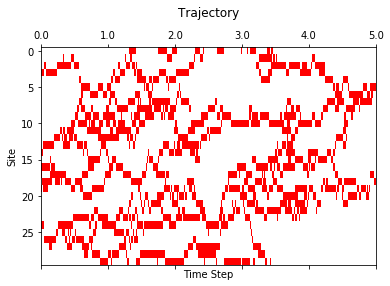

744
744.0


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnRXF1aWxpYnJhdGluZyBUUFMnLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHTigKY=


581
581.0
581
581.0
581
581.0
634
634.0
662
662.0
721
721.0
567
567.0
583
583.0
567
567.0
567
567.0


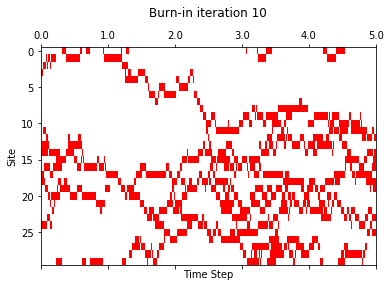

565
565.0
552
552.0
552
552.0
626
626.0
552
552.0
769
769.0
791
791.0
686
686.0
551
551.0
551
551.0


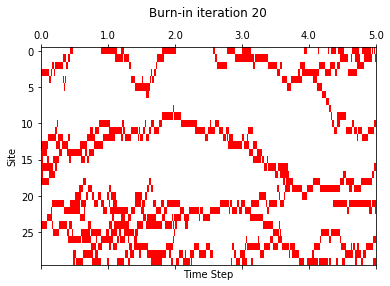

551
551.0
662
662.0
777
777.0
550
550.0
762
762.0
756
756.0
635
635.0
550
550.0
732
732.0
540
540.0


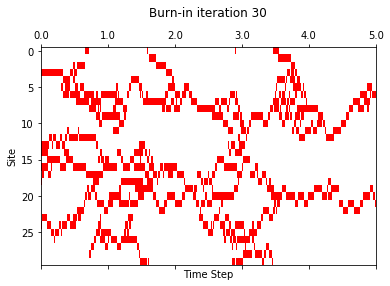

540
540.0
676
676.0
621
621.0
539
539.0
538
538.0
676
676.0
538
538.0
792
792.0
534
534.0
534
534.0


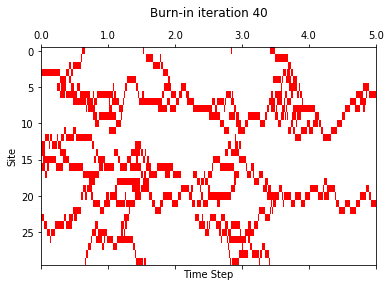

534
534.0
535
535.0
534
534.0
685
685.0
759
759.0
534
534.0
630
630.0
647
647.0
534
534.0
533
533.0


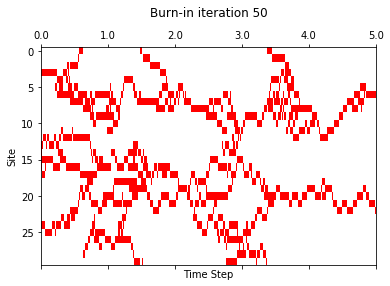

733
733.0
604
604.0
534
534.0
535
535.0
534
534.0
534
534.0
532
532.0
532
532.0
531
531.0
531
531.0


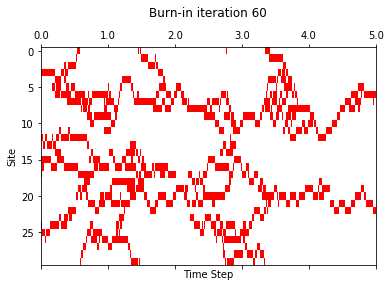

444
444.0
512
512.0
637
637.0
446
446.0
657
657.0
444
444.0
684
684.0
444
444.0
648
648.0
694
694.0


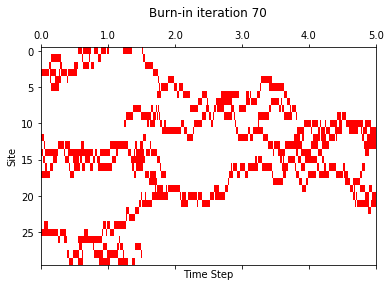

444
444.0
444
444.0
579
579.0
794
794.0
717
717.0
330
330.0
330
330.0
463
463.0
644
644.0
331
331.0


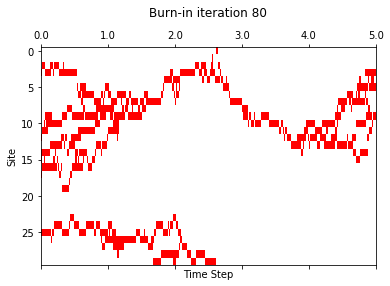

331
331.0
686
686.0
787
787.0
780
780.0
754
754.0
329
329.0
677
677.0
687
687.0
564
564.0
329
329.0


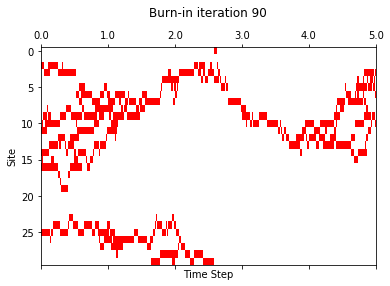

330
330.0
331
331.0
329
329.0
329
329.0
853
853.0
722
722.0
329
329.0
637
637.0
329
329.0
721
721.0


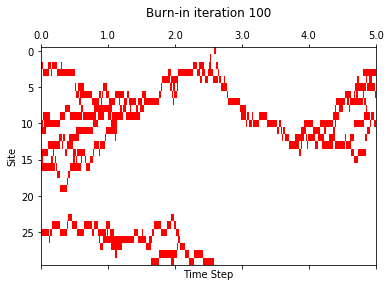

SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnR2VuZXJhdGluZyBUUFMgc2FtcGxlcycsIG1heD0xMC4wLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGTigKY=


328
328.0
715
715.0
327
327.0
593
593.0
325
325.0
695
695.0
323
323.0
323
323.0
644
644.0
790
790.0


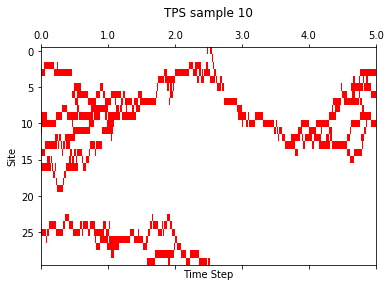

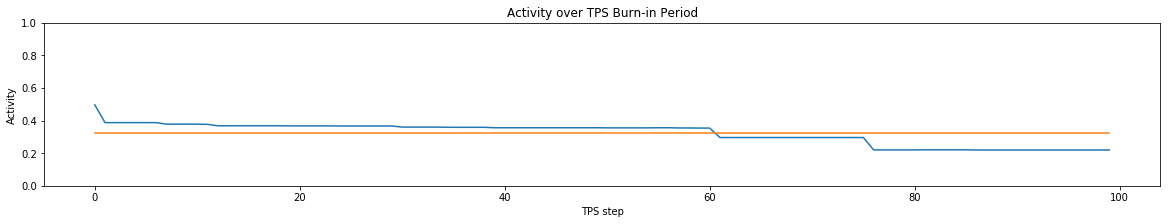

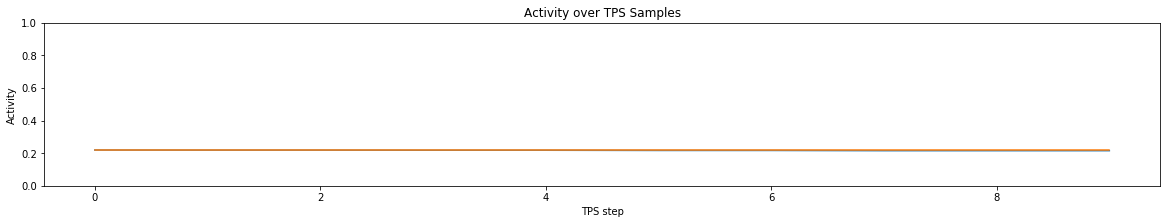

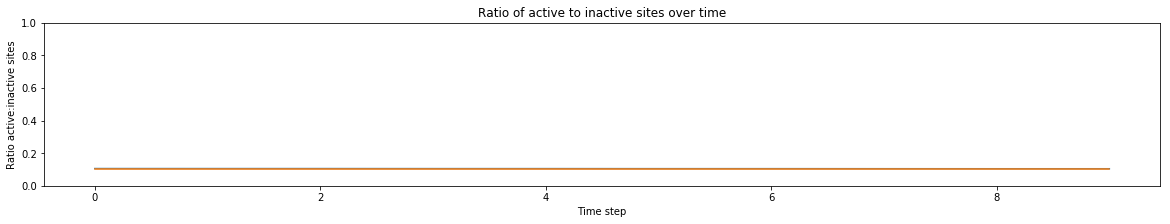

0.2172

In [3]:
s = 1.

logging.basicConfig(level=logging.INFO)

fa_kcm = SoftenedFA(gamma=0.25, s=s, eps=eps, num_burnin_steps=1000, num_sites=30, num_steps=10000,time_step=time_step)
tps = SoftenedFATPS(fa_kcm, fa_kcm.activity_intensive)
#tps = SoftenedFATPS(fa_kcm, lambda t, o: fa_kcm.fixed_time_activity(t, o, 250.))
tps.mc_average(num_samples=10, num_burnin_steps=100, draw=True, draw_every=10)

INFO:root:Neighboring spins; Rate activation; Rate inactivation
INFO:root:Rate Flip (activation) [1, 0, 1]-> [1, 1, 1]: 0.5
INFO:root:Rate Flip (deaactivation)[1, 1, 1]-> [1, 0, 1]: 2.0 
INFO:root:Rate swap [1, 0, 1] -> [1, 1, 0]: 1.28064643052
INFO:root:Rate swap [1, 1, 1] -> [1, 1, 1]: 0.0
INFO:root:Rate Flip (activation) [1, 0, 0]-> [1, 1, 0]: 0.25
INFO:root:Rate Flip (deaactivation)[1, 1, 0]-> [1, 0, 0]: 1.0 
INFO:root:Rate swap [1, 0, 0] -> [1, 0, 0]: 0.0
INFO:root:Rate swap [1, 1, 0] -> [1, 0, 1]: 1.28064643052
INFO:root:Rate Flip (activation) [0, 0, 1]-> [0, 1, 1]: 0.25
INFO:root:Rate Flip (deaactivation)[0, 1, 1]-> [0, 0, 1]: 1.0 
INFO:root:Rate swap [0, 0, 1] -> [0, 1, 0]: 1.28064643052
INFO:root:Rate swap [0, 1, 1] -> [0, 1, 1]: 0.0
INFO:root:Rate Flip (activation) [0, 0, 0]-> [0, 1, 0]: 0.0
INFO:root:Rate Flip (deaactivation)[0, 1, 0]-> [0, 0, 0]: 0.0 
INFO:root:Rate swap [0, 0, 0] -> [0, 0, 0]: 0.0
INFO:root:Rate swap [0, 1, 0] -> [0, 0, 1]: 1.28064643052
INFO:root:Biasing 

alpha 0.445137814517, g -1.48581266468


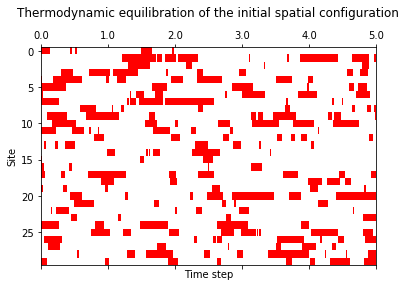

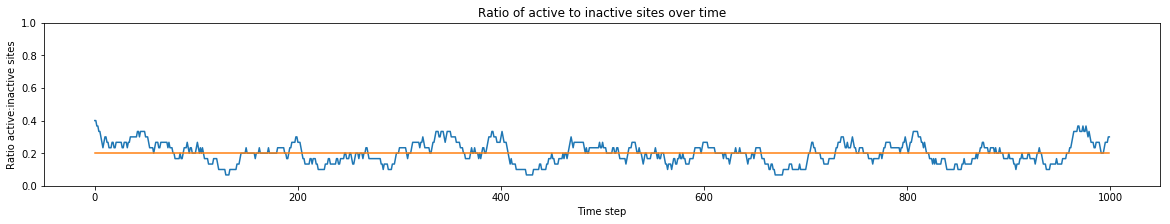

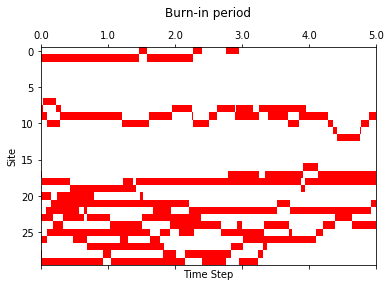

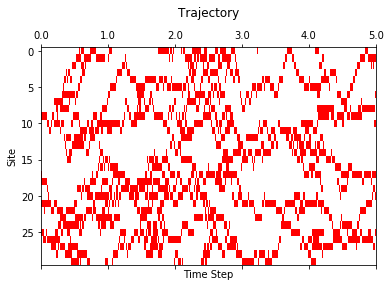

992
-992.0


SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnRXF1aWxpYnJhdGluZyBUUFMnLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHTigKY=


709
-709.0
862
-862.0
992
-992.0
993
-993.0
992
-992.0
880
-880.0
995
-995.0
995
-995.0
908
-908.0
995
-995.0


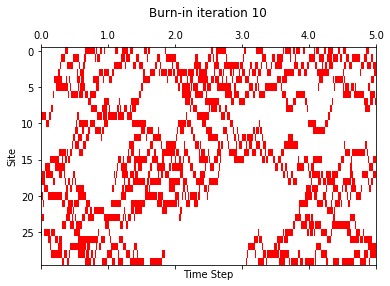

994
-994.0
994
-994.0
994
-994.0
997
-997.0
996
-996.0
814
-814.0
893
-893.0
996
-996.0
679
-679.0
1027
-1027.0


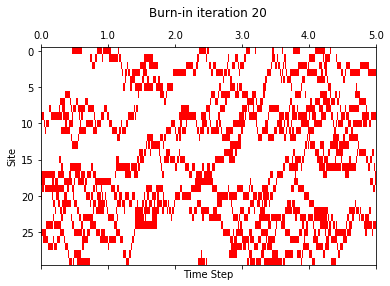

989
-989.0
1048
-1048.0
1047
-1047.0
880
-880.0
739
-739.0
604
-604.0
1048
-1048.0
1048
-1048.0
1048
-1048.0
771
-771.0


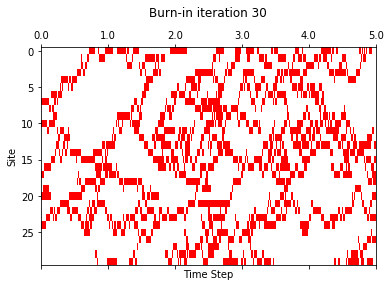

1019
-1019.0
1052
-1052.0
1054
-1054.0
787
-787.0
929
-929.0
1054
-1054.0
675
-675.0
1054
-1054.0
1054
-1054.0
817
-817.0


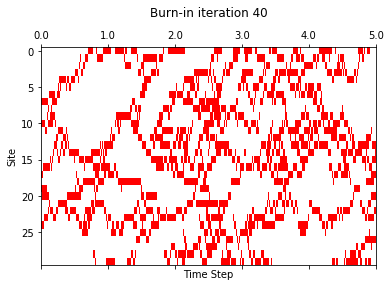

921
-921.0
1054
-1054.0
1010
-1010.0
1055
-1055.0
719
-719.0
1055
-1055.0
803
-803.0
983
-983.0
1058
-1058.0
1061
-1061.0


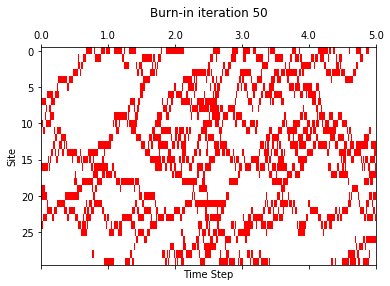

1062
-1062.0
1065
-1065.0
832
-832.0
636
-636.0
520
-520.0
1065
-1065.0
963
-963.0
722
-722.0
910
-910.0
824
-824.0


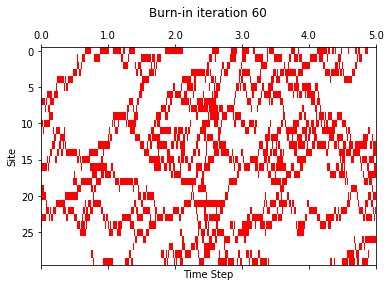

1067
-1067.0
1069
-1069.0
598
-598.0
1069
-1069.0
1070
-1070.0
1070
-1070.0
996
-996.0
707
-707.0
804
-804.0
1069
-1069.0


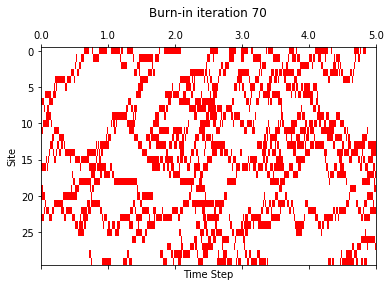

970
-970.0
1069
-1069.0
1069
-1069.0
1069
-1069.0
1070
-1070.0
949
-949.0
1111
-1111.0
1113
-1113.0
1114
-1114.0
1113
-1113.0


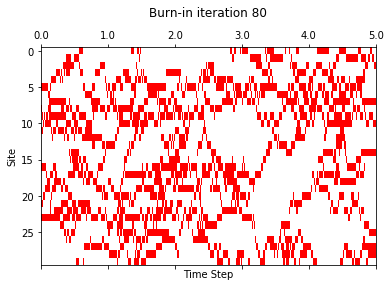

984
-984.0
1112
-1112.0
1114
-1114.0


In [ ]:
s = -1.

fa_kcm = SoftenedFA(gamma=0.25, s=s, eps=eps, num_burnin_steps=1000, num_sites=30, num_steps=10000,time_step=time_step)
tps = SoftenedFATPS(fa_kcm, fa_kcm.activity_intensive)

#tps = SoftenedFATPS(fa_kcm, lambda t, o: fa_kcm.fixed_time_activity(t, o, 250.))
tps.mc_average(num_samples=10, num_burnin_steps=100, draw=True, draw_every=10)

In [ ]:
s = 0.005

fa_kcm = SoftenedFA(gamma=0.25, s=s, eps=eps, num_burnin_steps=1000, num_sites=30, num_steps=10000,time_step=time_step)
tps = SoftenedFATPS(fa_kcm, fa_kcm.activity_intensive)
#tps = SoftenedFATPS(fa_kcm, lambda t, o: fa_kcm.fixed_time_activity(t, o, 250.))
tps.mc_average(num_samples=10, num_burnin_steps=100, draw=True, draw_every=10)

ss = np.arange(0, 0.008, 0.001)

#logging.basicConfig(level=logging.INFO)
eps = 0.0063

activities = np.zeros(ss.size)
for i,s in enumerate(ss):
    #print("Softening parameter, epsilon: {}; Biasing field, s: {}".format(eps, s))
    fa_kcm = SoftenedFA(gamma=0.25, s=s, eps=eps, num_burnin_steps=1000, num_sites=30, num_steps=1000)
    print("crit s", fa_kcm.get_critical_s())
    tps = SoftenedFATPS(fa_kcm, fa_kcm.activity)
    activities[i] = tps.mc_average(10, num_burnin_steps=10)
    print("Activity: {}".format(activities[i]))
        # draw_trajectory(trajectory, occupation_times)
   
plt.plot(ss, activities, )
plt.xlabel("s")
plt.ylabel("K")
plt.title("Activity with s for fixed epsilon = {}".format(eps))

ss = np.array([-1., -1e-1, -1e-3, -1e-4, 1e-4, 1e-3, 1e-1, 1.])

eps = 0.

activities = np.zeros(ss.size)
for i,s in enumerate(ss):
    #print("Softening parameter, epsilon: {}; Biasing field, s: {}".format(eps, s))
    fa_kcm = SoftenedFA(gamma=0.25, s=s, eps=eps, num_burnin_steps=1000, num_sites=60, num_steps=1000)
    print("crit s", fa_kcm.get_critical_s())

    tps = SoftenedFATPS(fa_kcm, fa_kcm.activity)
    activities[i] = tps.mc_average(10, num_burnin_steps=10)
    print("Activity: {}".format(activities[i]))
        # draw_trajectory(trajectory, occupation_times)
   
plt.plot(ss, activities, )
plt.xlabel("s")
plt.ylabel("K")
plt.title("Activity with s for fixed epsilon = {}".format(eps))

ss = np.array([-1., -1e-1, -1e-2, -1e-3, -5e-4, -1e-4, 1e-4, 5e-4,1e-3, 1e-2, 1e-1, 1.])

#logging.basicConfig(level=logging.INFO)
eps = 0.001

activities = np.zeros(ss.size)
for i,s in enumerate(ss):
    #print("Softening parameter, epsilon: {}; Biasing field, s: {}".format(eps, s))
    fa_kcm = SoftenedFA(gamma=0.25, s=s, eps=eps, num_burnin_steps=1000, num_sites=60, num_steps=1000)
    tps = SoftenedFATPS(fa_kcm, fa_kcm.activity)
    activities[i] = tps.mc_average(10, num_burnin_steps=10)
    print("Activity: {}".format(activities[i]))
        # draw_trajectory(trajectory, occupation_times)
   
plt.plot(ss, activities, )
plt.xlabel("s")
plt.ylabel("K")
plt.title("Activity with s for fixed epsilon = {}".format(eps))

s = 0.
#logging.basicConfig(level=logging.INFO)
epss = np.array([0., 5e-5, 1e-5, 5e-4, 1e-4,5e-3,1e-3, 1e-1])


activities = np.zeros(epss.size)
for i, eps in enumerate(epss):
    #print("Softening parameter, epsilon: {}; Biasing field, s: {}".format(eps, s))
    fa_kcm = SoftenedFA(gamma=0.25, s=s, eps=eps, num_burnin_steps=1000, num_sites=60, num_steps=1000)
    tps = SoftenedFATPS(fa_kcm, fa_kcm.activity)
    activities[i] = tps.mc_average(10, num_burnin_steps=10)
    print("Activity: {}".format(activities[i]))
    # draw_trajectory(trajectory, occupation_times)
   
plt.plot(epss, activities)
plt.xlabel("eps")
plt.ylabel("K")
plt.title("Activity with epsilon for fixed s = {}".format(s))

s = 0.01
#logging.basicConfig(level=logging.INFO)
epss = np.array([0., 1e-5, 1e-4, 1e-3, 1e-1, 0.2])


activities = np.zeros(epss.size)
for i, eps in enumerate(epss):
    #print("Softening parameter, epsilon: {}; Biasing field, s: {}".format(eps, s))
    fa_kcm = SoftenedFA(gamma=0.25, s=s, eps=eps, num_burnin_steps=1000, num_sites=60, num_steps=1000)
    tps = SoftenedFATPS(fa_kcm, fa_kcm.activity)
    activities[i] = tps.mc_average(10, num_burnin_steps=100)
    print("Activity: {}".format(activities[i]))
    # draw_trajectory(trajectory, occupation_times)
   
plt.plot(epss, activities)
plt.xlabel("eps")
plt.ylabel("K")
plt.title("Activity with epsilon for fixed s = {}".format(s))

#logging.basicConfig(level=logging.INFO)
epss = np.array([0., 1e-5, 1e-4, 1e-3, 1e-1, 0.2])
ss = np.zeros(epss.size)

activities = np.zeros(epss.size)
for i, eps in enumerate(epss):
    #print("Softening parameter, epsilon: {}; Biasing field, s: {}".format(eps, s))
    fa_kcm = SoftenedFA(gamma=0.25, eps=eps, num_burnin_steps=1000, num_sites=60, num_steps=1000)
    ss[i] = fa_kcm.s
    tps = SoftenedFATPS(fa_kcm, fa_kcm.activity)
    activities[i] = tps.mc_average(10, num_burnin_steps=100)
    print("Activity: {}".format(activities[i]))
    # draw_trajectory(trajectory, occupation_times)


plt.plot(epss, activities)
plt.xlabel("eps")
plt.ylabel("K")
plt.title("Activity with epsilon for fixed s = {}".format(s))
plt.show()

plt.plot(epss, ss)
plt.xlabel("eps")
plt.ylabel("s")
plt.title("Critical biasing field for epsilon".format(s))
plt.show()